In [412]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats
def gaussian(x,a,b,c): #a-height, b-center, c-std, d-vertical shift
    return a*np.exp(-(x-b)**2/(2*c**2))
def fittogauss(data,guesses,a,b,col,title):
    #plt.figure(figsize=(10,5))
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1],guesses[2]]
    best_vals,covar = curve_fit(gaussian,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=gaussian(x1[i],best_vals[0],best_vals[1],best_vals[2])
    plt.plot(x1,y1,col)
    plt.title(title)
    plt.xlabel('Wavelength(nm)')
    plt.ylabel('Counts')
    plt.scatter(data[:,0],data[:,1],c='black',s=1)
    err = np.sqrt(np.diag(covar))
    return best_vals,err
e = 1.6022e-19
c = 299792458

In [530]:
R = 218 #ohms
tri1IV = np.array(pd.read_table('Exp1-Tr1-Uncorrect_V_vs_I'))
tri1S = np.array(pd.read_table('Exp1-Tr1-Spectrum.txt'))
tri2IV = np.array(pd.read_table('Exp1-Tr2-Uncorrect_V_vs_I'))
tri2S = np.array(pd.read_table('Exp1-Tr2-Spectrum.txt'))
tri3IV = np.array(pd.read_table('Exp1-Tr3-Uncorrect_V_vs_I'))
tri3S = np.array(pd.read_table('Exp1-Tr3-Spectrum.txt'))
tri4IV = np.array(pd.read_table('Exp1-Tr4-Uncorrect_V_vs_I'))
tri4S = np.array(pd.read_table('Exp1-Tr4-Spectrum.txt'))
tri5IV = np.array(pd.read_table('Exp1-Tr5-Uncorrect_V_vs_I'))
tri5S = np.array(pd.read_table('Exp1-Tr5-Spectrum.txt'))
tri6IV = np.array(pd.read_table('Exp1-Tr6-Uncorrect_V_vs_I'))
tri6S = np.array(pd.read_table('Exp1-Tr6-Spectrum.txt'))
tri1IVc = np.zeros(tri1IV.shape)
tri2IVc = np.zeros(tri2IV.shape)
tri3IVc = np.zeros(tri3IV.shape)
tri4IVc = np.zeros(tri4IV.shape)
tri5IVc = np.zeros(tri5IV.shape)
tri6IVc = np.zeros(tri6IV.shape)

In [531]:
for i in range(0,len(tri1IV)):
    tri1IV[i,0]=tri1IV[i,0]-(tri1IV[i,1]*R/1000000000)
for i in range(0,len(tri2IV)):
    tri2IV[i,0]=tri2IV[i,0]-(tri2IV[i,1]*R/1000000000)
for i in range(0,len(tri3IV)):
    tri3IV[i,0]=tri3IV[i,0]-(tri3IV[i,1]*R/1000000000)
for i in range(0,len(tri4IV)):
    tri4IV[i,0]=tri4IV[i,0]-(tri4IV[i,1]*R/1000000000)
for i in range(0,len(tri5IV)):
    tri5IV[i,0]=tri5IV[i,0]-(tri5IV[i,1]*R/1000000000)
for i in range(0,len(tri6IV)):
    tri6IV[i,0]=tri6IV[i,0]-(tri6IV[i,1]*R/1000000000)

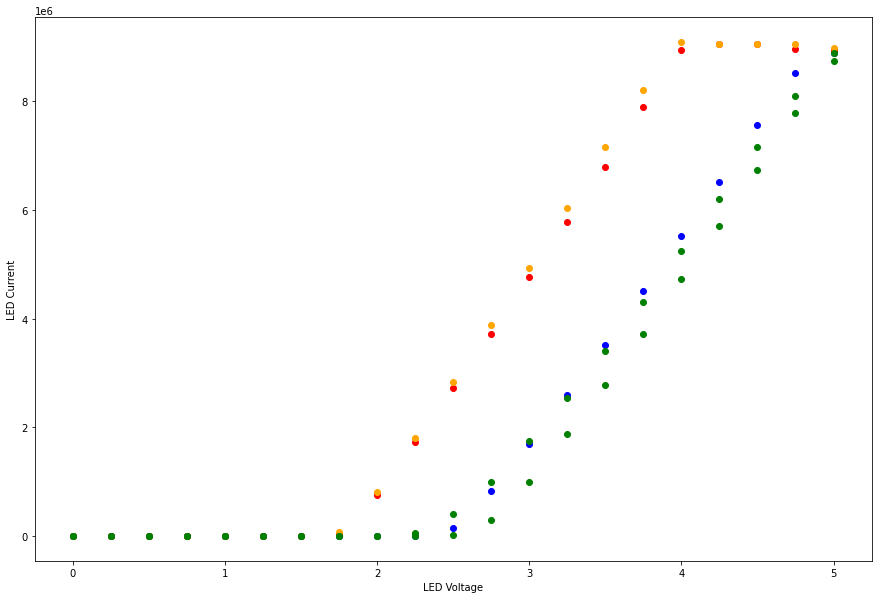

In [527]:
plt.figure(figsize = (15,10))
plt.scatter(tri1IV[:,0],tri1IV[:,1],color = 'b')
#plt.scatter(tri2IV[:,0],tri2IV[:,1])
plt.scatter(tri3IV[:,0],tri3IV[:,1],color = 'r')
plt.scatter(tri4IV[:,0],tri4IV[:,1],color = 'orange')
plt.scatter(tri5IV[:,0],tri5IV[:,1],color = 'g')
plt.scatter(tri6IV[:,0],tri6IV[:,1],color = 'g')
plt.xlabel('LED Voltage')
plt.ylabel('LED Current')
def line(x,a,b):
    return a*(x-b)
def fittoline(data,guesses,a,b,col,title):
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(line,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=line(x1[i],best_vals[0],best_vals[1])
    plt.plot(x1,y1,col)
    plt.title(title)
    plt.xlabel('LED Voltage (V)')
    plt.ylabel('Current (nA)')
    plt.scatter(data[:,0],data[:,1],c='black',s=2)
    err = np.sqrt(np.diag(covar))
    return best_vals,err

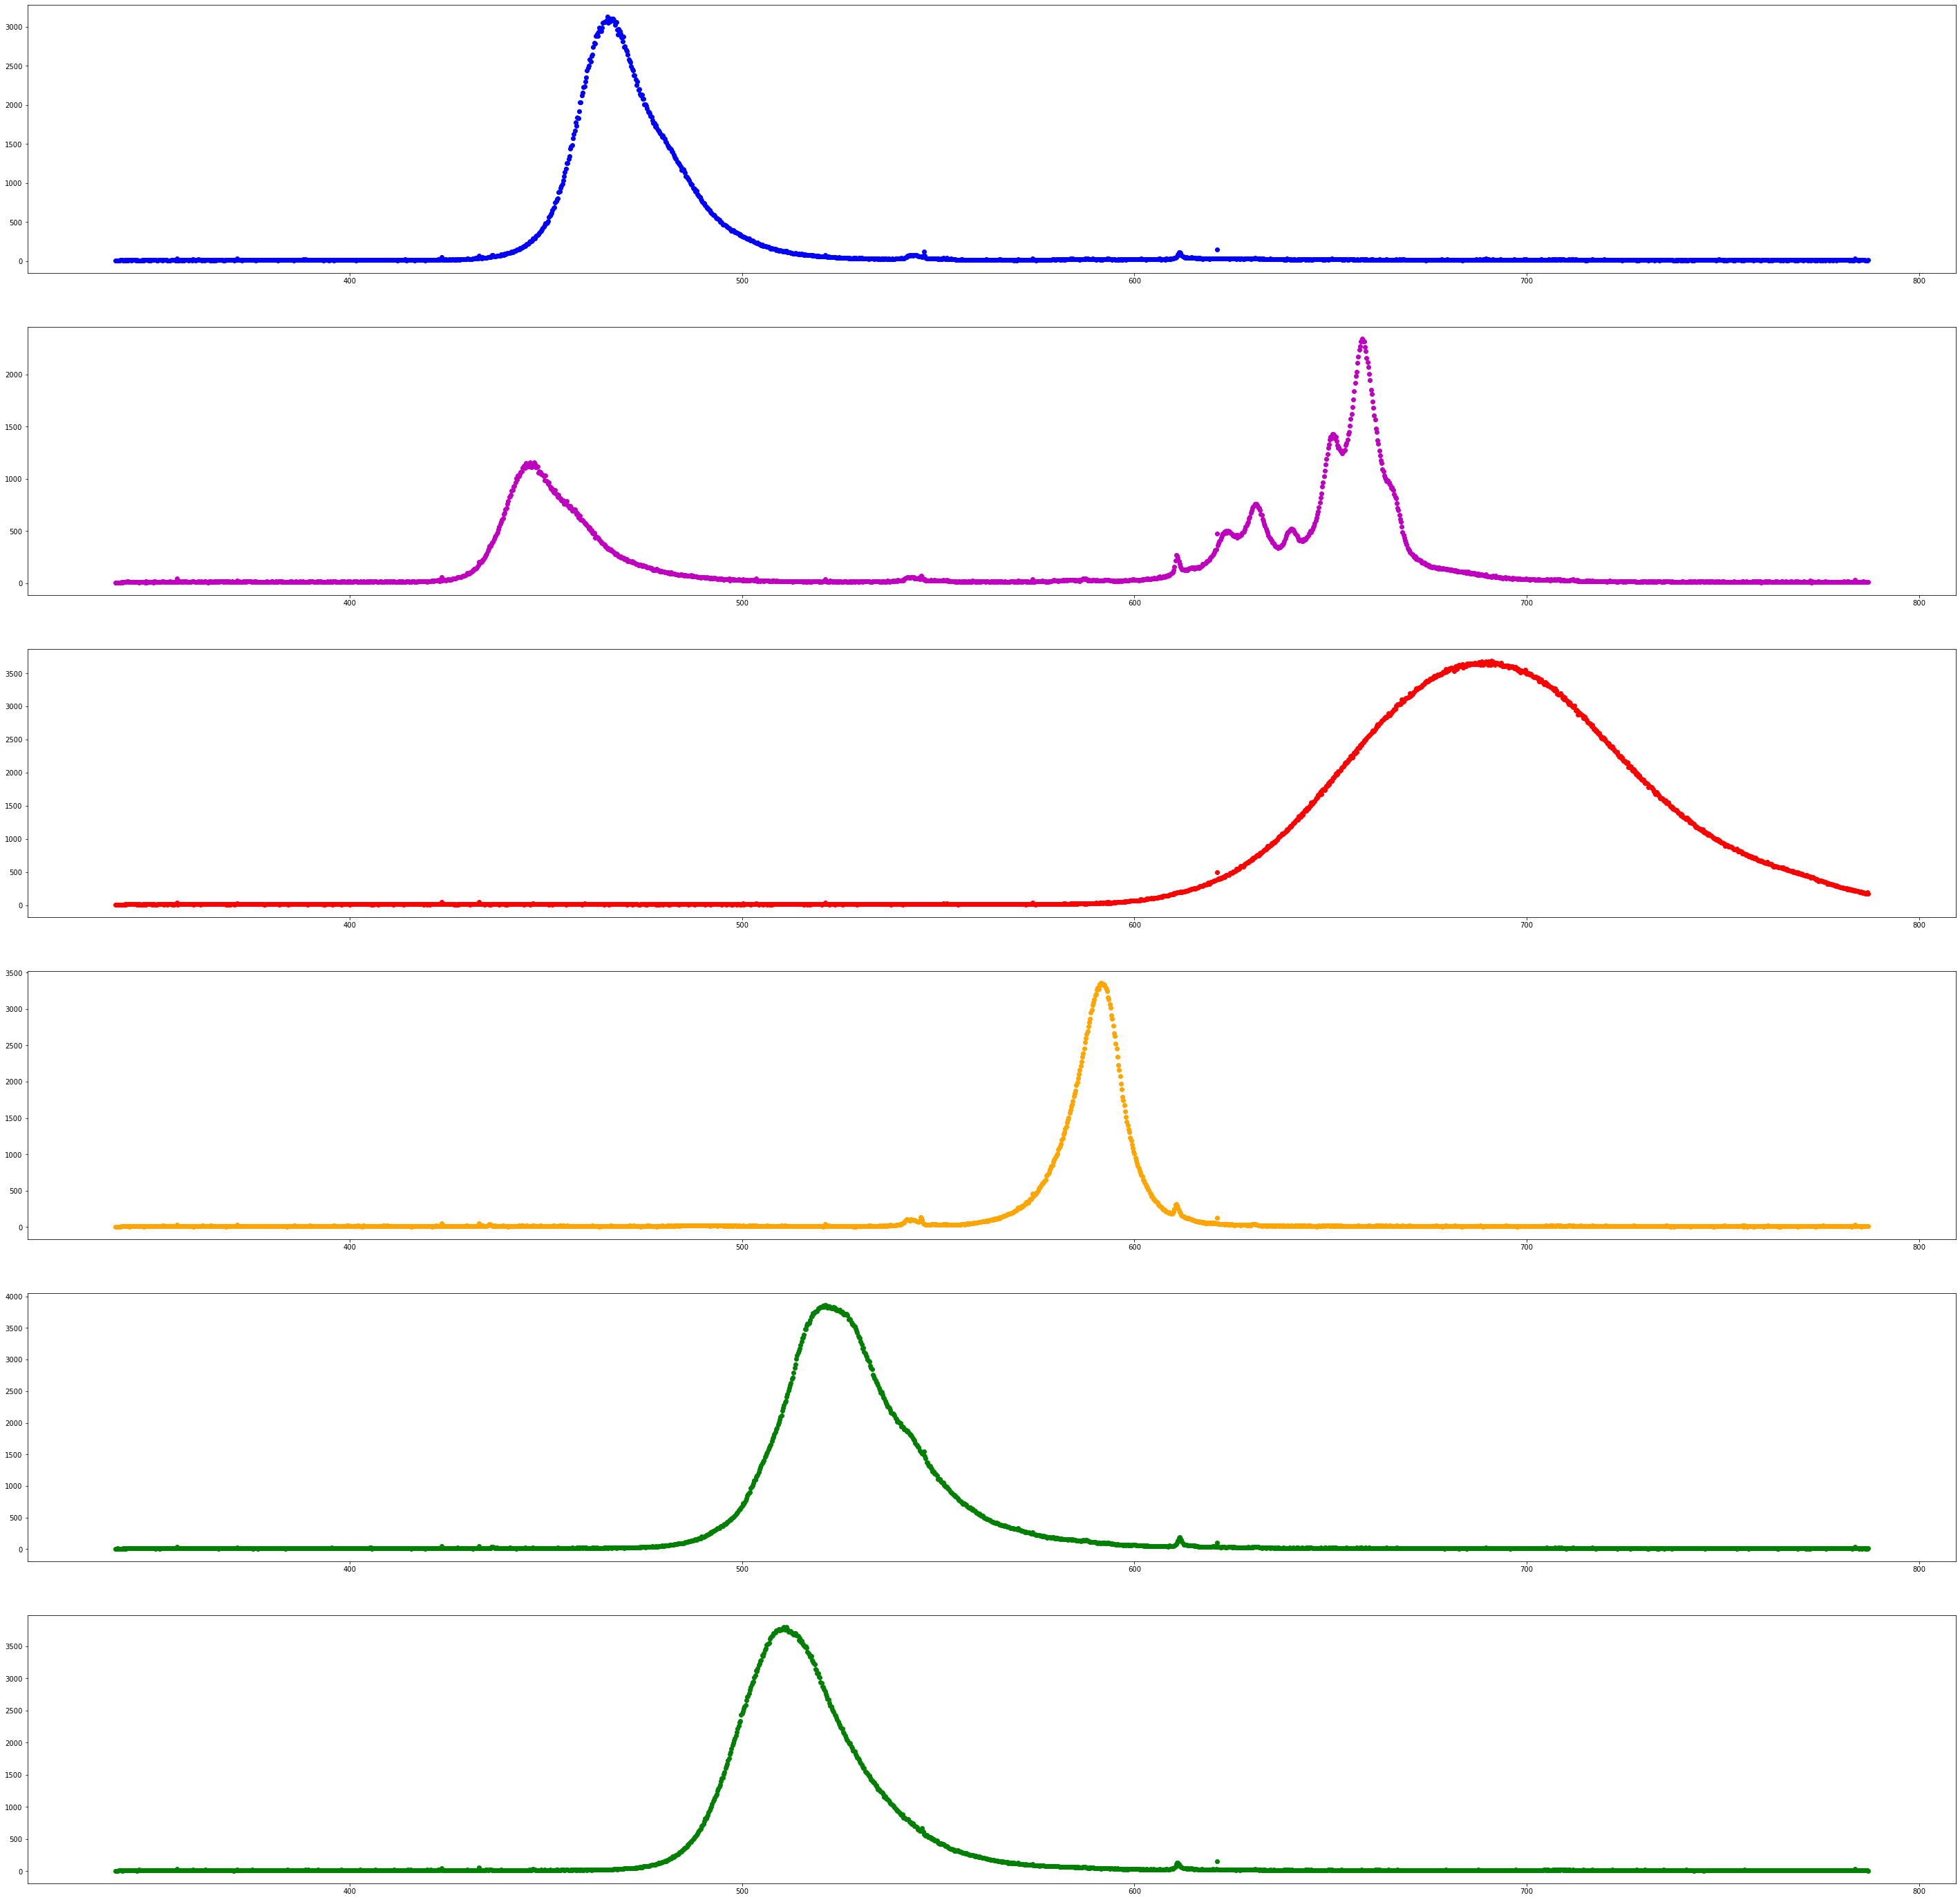

In [363]:
fig, (axs1,axs2,axs3,axs4,axs5,axs6)= plt.subplots(6,figsize=(50,50))

axs1.scatter(tri1S[:,0],tri1S[:,1],color = 'b')
axs2.scatter(tri2S[:,0],tri2S[:,1],color = 'm')
axs3.scatter(tri3S[:,0],tri3S[:,1],color = 'r')
axs4.scatter(tri4S[:,0],tri4S[:,1],color = 'orange')
axs5.scatter(tri5S[:,0],tri5S[:,1],color = 'g')
axs6.scatter(tri6S[:,0],tri6S[:,1],color = 'g')

Text(0, 0.5, 'Intensity (Counts)')

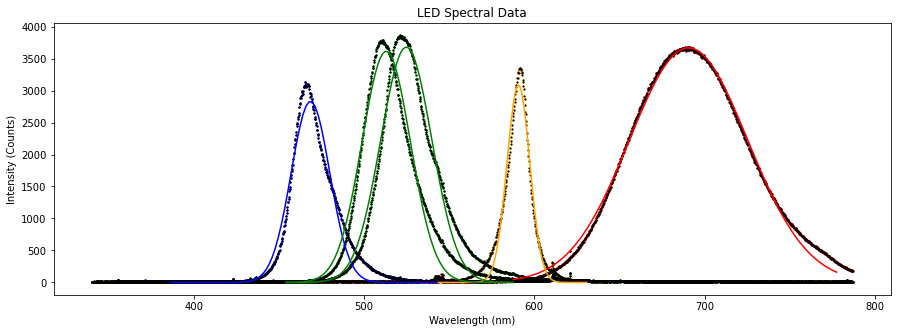

In [549]:
plt.figure(figsize = (15,5))
plt.scatter(tri1S[:,0],tri1S[:,1],color = 'b',s=2)
#plt.scatter(tri2S[:,0],tri2S[:,1],color = 'm',s=1)
plt.scatter(tri3S[:,0],tri3S[:,1],color = 'r',s=2)
plt.scatter(tri4S[:,0],tri4S[:,1],color = 'orange',s=2)
plt.scatter(tri5S[:,0],tri5S[:,1],color = 'g',s=2)
plt.scatter(tri6S[:,0],tri6S[:,1],color = 'g',s=2)


fittogauss(tri1S,[3000,450,20],200,1000,'b','Trial 1')
fittogauss(tri3S,[2500,700,50],1100,2000,'r','Trial 3')
fittogauss(tri4S,[3000,570,10],900,1300,'orange','Trial 4')
fittogauss(tri5S,[3000,520,20],500,1100,'g','Trial 5')
fittogauss(tri6S,[3000,520,20],500,1100,'g','Trial 6')
plt.title('LED Spectral Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Counts)')

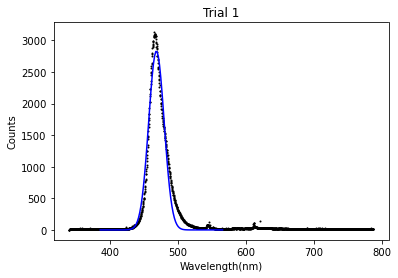

In [537]:
tri1Sfit = fittogauss(tri1S,[3000,450,20],200,1000,'b','Trial 1')

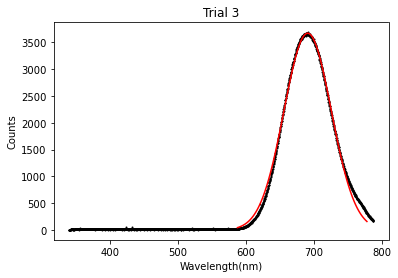

In [538]:
tri3Sfit = fittogauss(tri3S,[2500,700,50],1100,2000,'r','Trial 3')

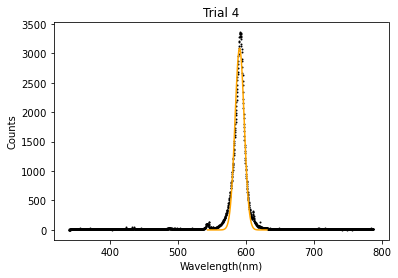

In [539]:
tri4Sfit = fittogauss(tri4S,[3000,570,10],900,1300,'orange','Trial 4')

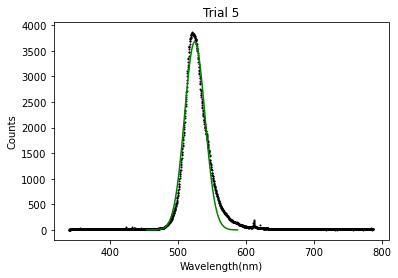

In [540]:
tri5Sfit = fittogauss(tri5S,[3000,520,20],500,1100,'g','Trial 5')

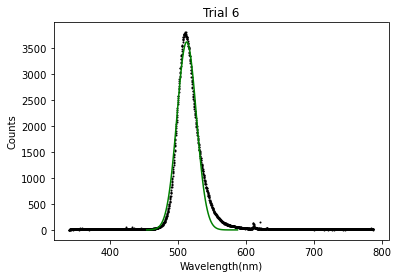

In [541]:
tri6Sfit = fittogauss(tri6S,[3000,520,20],500,1100,'g','Trial 6')

Text(0.5, 1.0, 'LED Current vs. Voltage')

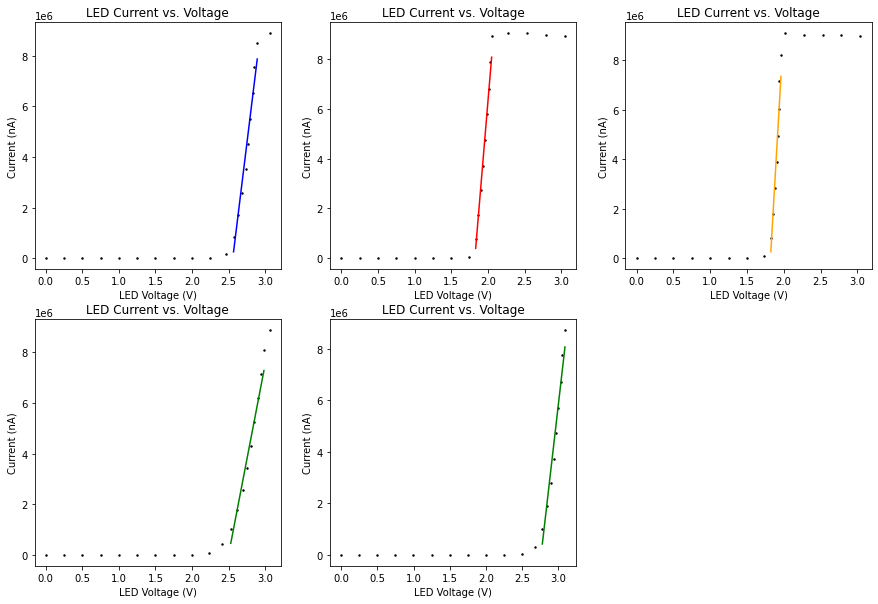

In [532]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
fittoline(tri1IV,[1000000000,2.5],11,19,'b','LED Current vs. Voltage')
plt.subplot(2,3,2)
tri3IVfit = fittoline(tri3IV,[1000000000,1.7],8,16,'r','LED Current vs. Voltage')
plt.subplot(2,3,3)
tri4IVfit = fittoline(tri4IV,[100000000,1.7],8,15,'orange','LED Current vs. Voltage')
plt.subplot(2,3,4)
tri5IVfit = fittoline(tri5IV,[100000000,2.7],11,19,'g','LED Current vs. Voltage')
plt.subplot(2,3,5)
tri6IVfit = fittoline(tri6IV,[100000000,2.8],12,20,'g','LED Current vs. Voltage')
plt.title('LED Current vs. Voltage')

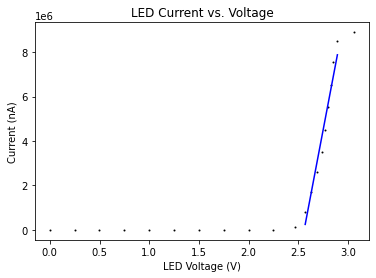

In [385]:
tri1IVfit = fittoline(tri1IV,[1000000000,2.5],11,19,'b','LED Current vs. Voltage')

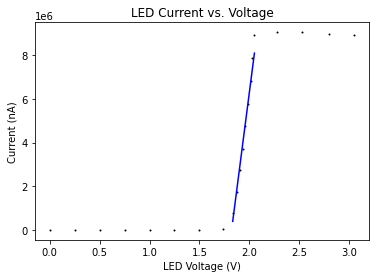

In [401]:
tri3IVfit = fittoline(tri3IV,[1000000000,1.7],8,16,'b','LED Current vs. Voltage')

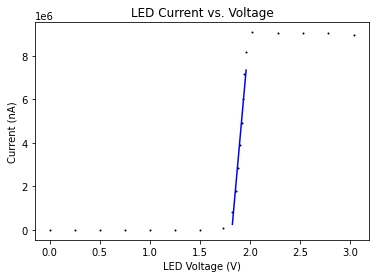

In [384]:
tri4IVfit = fittoline(tri4IV,[100000000,1.7],8,15,'b','LED Current vs. Voltage')

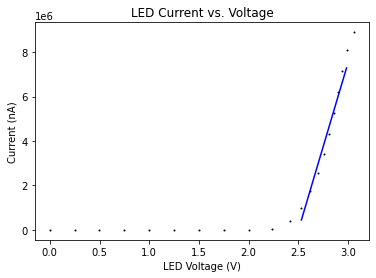

In [386]:
tri5IVfit = fittoline(tri5IV,[100000000,2.7],11,19,'b','LED Current vs. Voltage')

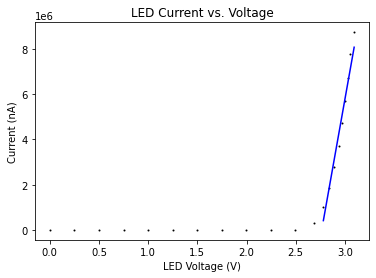

In [435]:
tri6IVfit = fittoline(tri6IV,[100000000,2.8],12,20,'b','LED Current vs. Voltage')

In [475]:
def fittoline(data,guesses,a,b,col,title):
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(line,x,y,p0=init_vals)
    x1 = np.linspace(np.min(data[:,0]),np.max(data[:,0]),100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=line(x1[i],best_vals[0],best_vals[1])
    plt.plot(x1,y1,col)
    plt.title(title)
    plt.xlabel('Inverse Wavelength (1/m)')
    plt.ylabel('Turn-on Voltage (V)')
    plt.scatter(data[:,0],data[:,1],c='black',s=1)
    err = np.sqrt(np.diag(covar))
    print(err[0]*1.602e-19/299792458)
    return best_vals,'this is error',err

2.2990387272752774e-34
[[2.13403247e+06 2.55852520e+00]
 [1.44794102e+06 1.82233334e+00]
 [1.69285712e+06 1.81954415e+00]
 [1.90522782e+06 2.50101925e+00]
 [1.94905195e+06 2.76429270e+00]]
6.725128245541571e-34
-1.4949773476822747 %


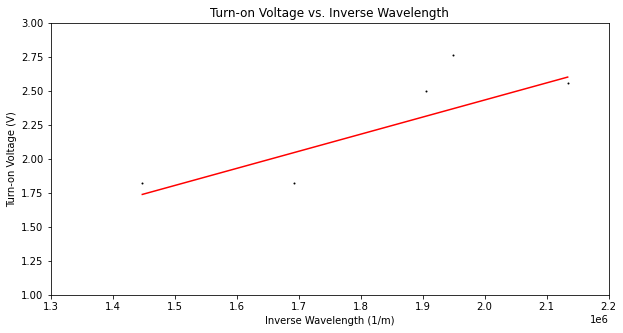

In [476]:
plt.figure(figsize = (10,5))
wavelengths = [tri1Sfit[0][1],tri3Sfit[0][1],tri4Sfit[0][1],tri5Sfit[0][1],tri6Sfit[0][1]]
turnon = [tri1IVfit[0][1],tri3IVfit[0][1],tri4IVfit[0][1],tri5IVfit[0][1],tri6IVfit[0][1]]
planckdata = [[1000000000/tri1Sfit[0][1],1000000000/tri3Sfit[0][1],1000000000/tri4Sfit[0][1],1000000000/tri5Sfit[0][1],1000000000/tri6Sfit[0][1]],[tri1IVfit[0][1],tri3IVfit[0][1],tri4IVfit[0][1],tri5IVfit[0][1],tri6IVfit[0][1]]]
planck = np.array(planckdata)
planck = np.transpose(planck)
plt.scatter(planck[0],planck[1])
plt.ylim(1,3)
plt.xlim(1300000,2200000)

slope = fittoline(planck,[.000002,0],0,4,'r','Turn-on Voltage vs. Inverse Wavelength')
h = slope[0][0]*1.602e-19/299792458
percenterr = 100*(6.62607e-34-h)/(6.62607e-34)
print(planck)
print(h)
print(percenterr,'%')

In [473]:
print(planck)

[[2.13403247e+06 2.55852520e+00]
 [1.44794102e+06 1.82233334e+00]
 [1.69285712e+06 1.81954415e+00]
 [1.90522782e+06 2.50101925e+00]
 [1.94905195e+06 2.76429270e+00]]


In [236]:
hvals = np.zeros(5)
for i in range(0,5):
    hvals[i]=wavelengths[i]*e*turnon[i]/(1e9*c)
print(hvals)
print(np.mean(hvals))
np.std(hvals)/np.sqrt(5)

[6.29580493e-34 6.79480379e-34 5.74431593e-34 7.12125324e-34
 7.57978062e-34]
6.707191703482485e-34


2.8544022658633974e-35

In [286]:
exp21 = np.array(pd.read_table('Exp2_Tr1_Spec_2.txt'))
exp22 = np.array(pd.read_table('Exp2_Tr1_Spec_1.txt'))   #swapped
exp23 = np.array(pd.read_table('Exp2_Tr1_Spec_3.txt'))
exp24 = np.array(pd.read_table('Exp2_Tr1_Spec_4.txt'))
exp25 = np.array(pd.read_table('Exp2_Tr1_Spec_5.txt'))
exp26 = np.array(pd.read_table('Exp2_Tr1_Spec_6.txt'))
exp27 = np.array(pd.read_table('Exp2_Tr1_Spec_7.txt'))
exp28 = np.array(pd.read_table('Exp2_Tr1_Spec_8.txt'))
exp29 = np.array(pd.read_table('Exp2_Tr1_Spec_9.txt'))
exp210 = np.array(pd.read_table('Exp2_Tr1_Spec_10.txt'))
exp2IV= np.array(pd.read_table('Exp2_Tr1_V_vs_I'))
tri1list = [exp21,exp22,exp23,exp24,exp25,exp26,exp27,exp28,exp29,exp210]

[  13.15073605  137.08962756  316.86624784  510.10182004  698.73692741
  893.48965932 1085.35218521 1267.90196905 1409.85901734 1394.77169759]


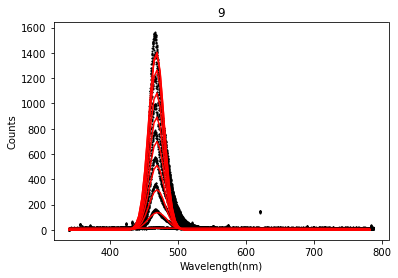

In [467]:
intensities=np.zeros(10)
plt.figure()
for i in range(0,10):
    intensities[i]=fittogauss(tri1list[i],[1500,470,15],0,2020,'r',i)[0][0]
print(intensities)

Text(0, 0.5, 'Intensity (Counts)')

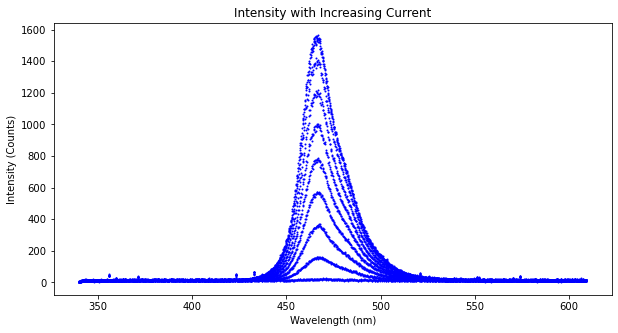

In [550]:
plt.figure(figsize=(10,5))
for i in range(0,10):
    plt.scatter(tri1list[i][0:1200,0],tri1list[i][0:1200,1],s=1,color='b')
plt.title('Intensity with Increasing Current')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Counts)')

0.9943339846182513
0.9943339846182513


Text(0, 0.5, 'Intensity (Counts)')

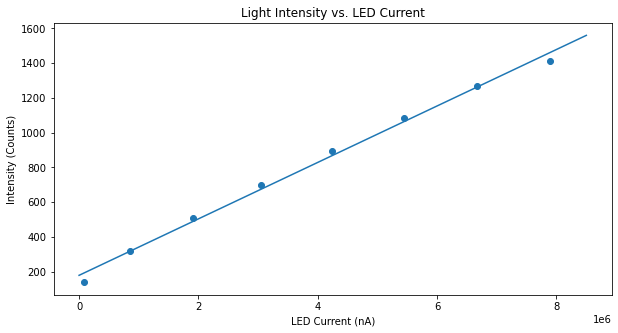

In [551]:
plt.figure(figsize=(10,5))
plt.scatter(exp2IV[1:9,1],intensities[1:9])
slope,intercept,rval,pval,sloperr = scipy.stats.linregress(exp2IV[1:9,1],intensities[1:9])
r_sq = 0.9971629679336529**2
print(r_sq)
print(rval**2)
x = np.linspace(0,8500000,100)
y = np.zeros(100)
for i in range(0,100):
    y[i]= slope*x[i]+intercept

plt.plot(x,y)
plt.title('Light Intensity vs. LED Current')
plt.xlabel('LED Current (nA)')
plt.ylabel('Intensity (Counts)')

In [458]:
IVfiterr = [tri1IVfit[1][1],tri3IVfit[1][1],tri4IVfit[1][1],tri5IVfit[1][1],tri6IVfit[1][1]]
print(IVfiterr)
print([tri1IVfit[0][1],tri3IVfit[0][1],tri4IVfit[0][1],tri5IVfit[0][1],tri6IVfit[0][1]])

[0.01607772242749487, 0.006736793796716797, 0.009049048857601745, 0.022376379568190878, 0.015472928536243408]
[2.5585252041268913, 1.822333342181924, 1.8195441478211696, 2.5010192463082057, 2.7642927008897433]


In [464]:
Sfiterr = [tri1Sfit[1][1],tri3Sfit[1][1],tri4Sfit[1][1],tri5Sfit[1][1],tri6Sfit[1][1]]
print(Sfiterr)

[0.09009007683536917, 0.07010395561995565, 0.06132425202584848, 0.10728182243383998, 0.09822471320401699]


In [534]:
print("\u00B1")

±


In [ ]:
dict = {'Run':[15,16,12],'Tube Temperature (C)':[150,170,180],'Avg Maxima Spacing':[space15,space16,space12],'Uncertainty (1 std)':[spacingerr12,spacingerr15,spacingerr16]}
df=pd.DataFrame(dict)
display(df)

In [544]:
wavelengths = [tri1Sfit[0][1],tri3Sfit[0][1],tri4Sfit[0][1],tri5Sfit[0][1],tri6Sfit[0][1]]
wverr = [tri1Sfit[1][1],tri3Sfit[1][1],tri4Sfit[1][1],tri5Sfit[1][1],tri6Sfit[1][1]]
turnon = [tri1IVfit[0][1],tri3IVfit[0][1],tri4IVfit[0][1],tri5IVfit[0][1],tri6IVfit[0][1]]
turnonerr = [tri1IVfit[1][1],tri3IVfit[1][1],tri4IVfit[1][1],tri5IVfit[1][1],tri6IVfit[1][1]]

In [547]:
print(wavelengths)
print(wverr)

[468.59643048805515, 690.6358662235494, 590.7173082279235, 524.8716143600661, 513.0699562594016]
[0.09009007683536917, 0.07010395561995565, 0.06132425202584848, 0.10728182243383998, 0.09822471320401699]


In [546]:
print(turnon)
print(turnonerr)

[2.5641652610166923, 1.822333342181924, 1.8195441478211696, 2.5010192463082057, 2.7642927008897433]
[0.015539986767035753, 0.006736793796716797, 0.009049048857601745, 0.022376379568190878, 0.015472928536243408]
